# MNIST digit classification

### 1. Load and preprocess data

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
x_test.shape
print(x_train.shape)

(60000, 28, 28)


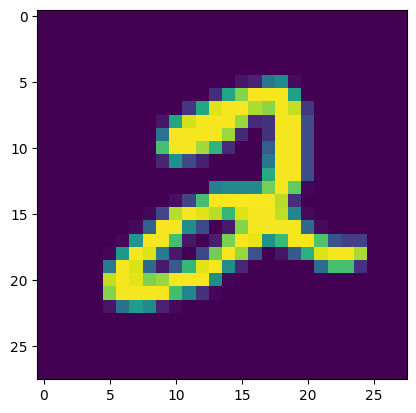

In [4]:
plt.imshow(x_train[5])

In [5]:
y_train[5]

np.uint8(2)

In [ ]:
# normalizing the data
x_train = x_train / 255.0
x_test = x_test / 255.0

In [7]:
x_train.shape

(60000, 28, 28)

### Build the MLP model

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')    
])

C:\Users\rhmar\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8777 - loss: 0.4225
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9686 - loss: 0.1051
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9788 - loss: 0.0690
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9832 - loss: 0.0541
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9873 - loss: 0.0380
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9896 - loss: 0.0322
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9909 - loss: 0.0268
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9928 - loss: 0.0214
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9929 - loss: 0.0200
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9942 - loss: 0.0176


In [10]:
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.1166


[0.09177153557538986, 0.9765999913215637]

In [11]:
# x_show = x_train.reshape(60000, 28 ,28)
# x_show.shape

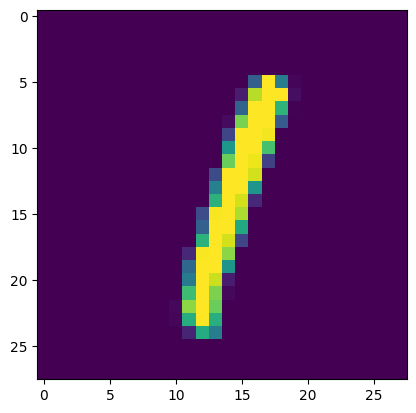

In [23]:
plt.imshow(x_test[5])
# plt.title(f"Label: {y_train[5]}")

In [ ]:
y_predict = model.predict(x_test)
np.argmax(y_predict[5])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


np.int64(2)

In [15]:
y_predict_labels = [np.argmax(i) for i in y_predict]
y_predict_labels[:5]

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4)]

In [16]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [17]:
cm = tf.math.confusion_matrix( labels = y_test, predictions = y_predict_labels)

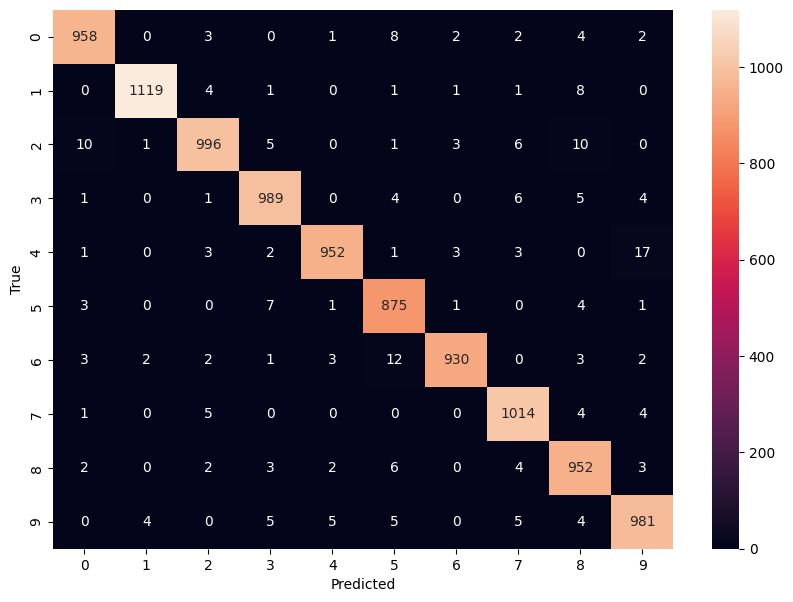

In [18]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm , annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")  
plt.show()
